Interactive viewer helps to select properties for OpenCV to perform better OCR.

<IPython.core.display.Javascript object>


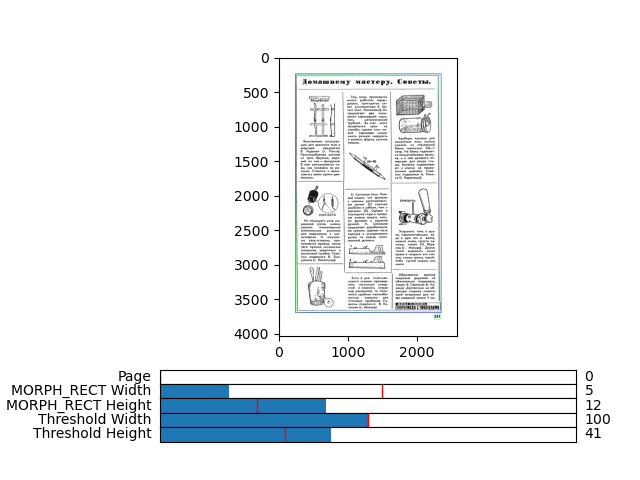

In [1]:
%matplotlib notebook
from ipywidgets import *
import glob

import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
pages = glob.glob('.\\temp\\*')
sliders = {}


def process_image(path):
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    mw, mh, tw, th = int(sliders['mw_slider'].val), int(sliders['mh_slider'].val), int(sliders['tw_slider'].val), int(sliders['th_slider'].val)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (mw, mh))
    dilate = cv2.dilate(thresh, kernel, iterations=4)
    contours = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < tw or rect[3] < th:
            continue
        x, y, w, h = rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)
    return image


def update(val):
    ax.imshow(process_image(pages[int(sliders['file_slider'].val)]))
    fig.canvas.draw_idle()


def plot_init():
    plt.subplots_adjust(left=0.25, bottom=0.3)
    ax_pages = fig.add_axes([0.25, 0.20, 0.65, 0.03])
    file_slider = Slider(ax_pages, 'Page', 0, len(pages) - 1, valinit=0, valstep=1)
    file_slider.on_changed(update)
    sliders['file_slider'] = file_slider

    ax_mw = fig.add_axes([0.25, 0.17, 0.65, 0.03])
    mw_slider = Slider(ax_mw, 'MORPH_RECT Width', 0, 30, valinit=16, valstep=1)
    mw_slider.on_changed(update)
    sliders['mw_slider'] = mw_slider

    ax_mh = plt.axes([0.25, 0.14, 0.65, 0.03])
    mh_slider = Slider(ax_mh, 'MORPH_RECT Height', 0, 30, valinit=7, valstep=1)
    mh_slider.on_changed(update)
    sliders['mh_slider'] = mh_slider

    ax_tw = fig.add_axes([0.25, 0.11, 0.65, 0.03])
    tw_slider = Slider(ax_tw, 'Threshold Width', 0, 200, valinit=100, valstep=1)
    tw_slider.on_changed(update)
    sliders['tw_slider'] = tw_slider

    ax_th = plt.axes([0.25, 0.08, 0.65, 0.03])
    th_slider = Slider(ax_th, 'Threshold Height', 0, 100, valinit=30, valstep=1)
    th_slider.on_changed(update)
    sliders['th_slider'] = th_slider

    update(0)
    plt.show()


def main():
    plot_init()


if __name__ == '__main__':
    main()
